In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/ES/code'
path = '/content/drive/My Drive/ES/code'

In [ ]:
from traces_bin_reader.TracesBin import TracesBin

import numpy as np

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt


In [ ]:
#f= TracesBin("../../traces_CW305/Artix7-100t/0_95V/50MHz/2021-09-21/2021-09-21_50MHz_125MSa_12bit_k0-00_1k.dat")
f = TracesBin("2021-10-25_100t_duDFS_VCC-1.00_freq-50.000MHz_125MSa_12bit_k0-01_1k.dat")
#f= TracesBin("2021-10-25_100t_duDFS_VCC-1.00_freq-50.000MHz_125MSa_12bit_k0-00_1k.dat")

In [ ]:
assert int.from_bytes(f.getKey(), 'big') == 0x007e151628aed2a6abf7158809cf4f3c

In [ ]:
assert f.getNTraces() == 500

In [ ]:
assert f.getNSamples() == 134016

In [ ]:
data, plain = f.getAllTraces()
assert int.from_bytes(plain[0], 'big') == 0x4e83db96249048278c2278e8583c283e

In [ ]:
data0, plain0 = f.getTraces([0])
assert all(data0[0]==data[0])
assert all(plain0[0]==plain[0])

In [ ]:
data

In [ ]:
data.shape


In [ ]:
assert len(data) == 500
print("✔️ OK to continue!")

In [ ]:
plt.figure()
plt.plot(data, 'r')
#plt.plot(data[1], 'g')
plt.show()

In [ ]:

plain

In [ ]:
plain.shape

In [ ]:
data[0]

In [ ]:
plain[0]

In [ ]:
data[1]

In [ ]:
plain[1]

In [ ]:
plain[2]

In [ ]:
some_sam= [4,56,1000]
data_some, plain_some= f.getSamples([1], some_sam)
assert all(plain_some[0]== plain[1])
assert all(data_some[0] == data[1,some_sam])


data and plain has to be converted in hex??? or maybe only plain!!!


In [ ]:
#convert numpy array to hex


In [ ]:
vhex = np.vectorize(hex)
vhex(plain)

# AES - table

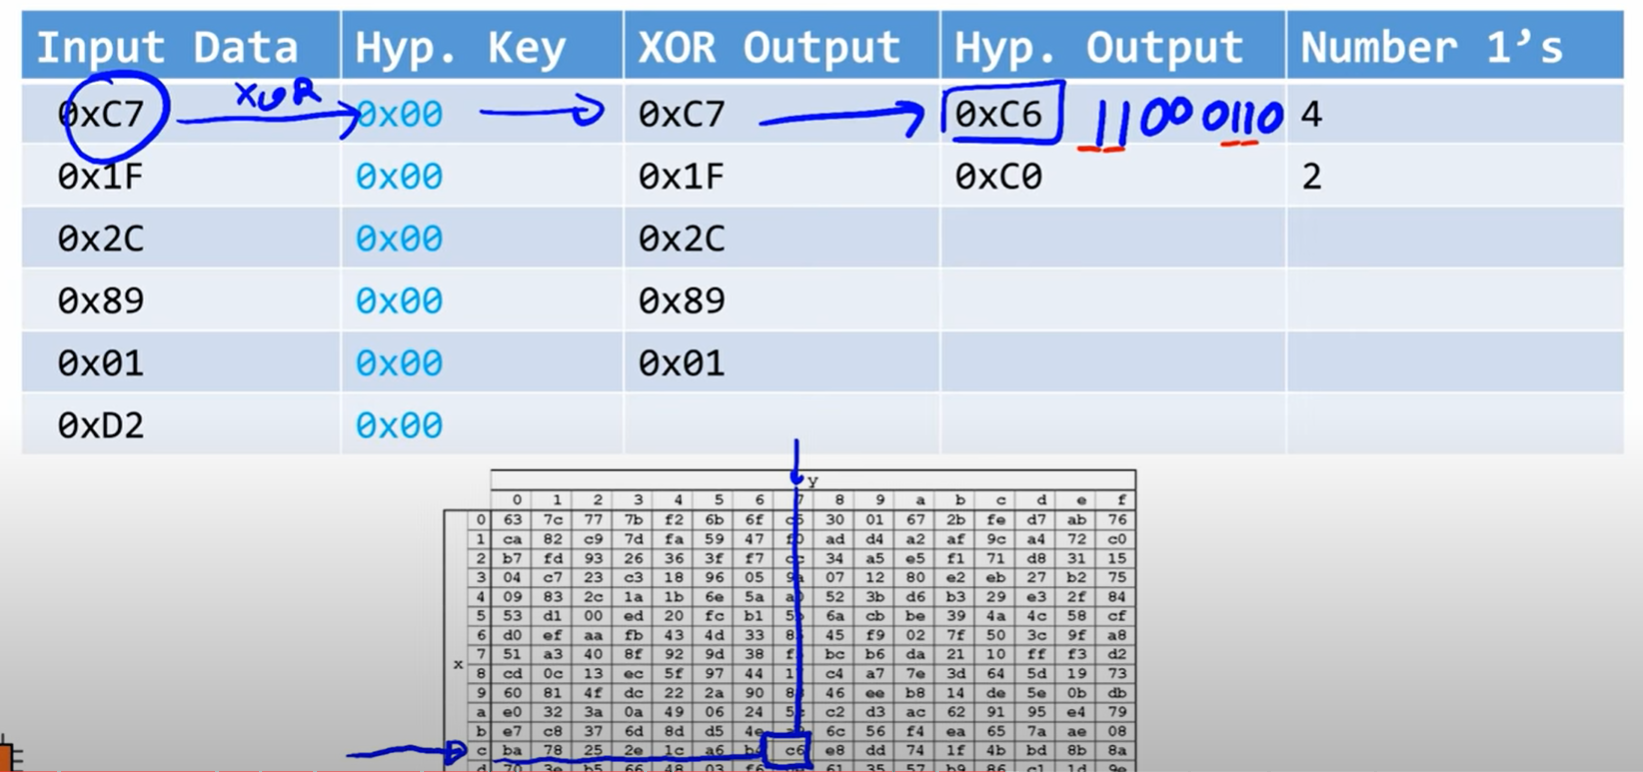

> Bloc indentat




https://github.com/prki/Correlation-power-analysis/blob/master/src/AES_CPA.py# 

https://github.com/skoppula/aes-sidechannel/blob/master/cpa/cpa.py

In [ ]:
sbox = [
        0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
        0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
        0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
        0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
        0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
        0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
        0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
        0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
        0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
        0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
        0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
        0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
        0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
        0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
        0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
        0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
        ]

In [ ]:
#Hypothetical keys:
corrKeyList = [0 for x in range(16)]

# Plain text
https://chipwhisperer.readthedocs.io/en/latest/tutorials/courses_sca101_soln_lab%204_2%20-openadc-cwlitearm.html#tutorial-courses-sca101-soln-lab-4-2-openadc-cwlitearm

In [ ]:
# plaintext xor hypothetical key:
def aes_internal(inputdata, key):
    return sbox[inputdata ^ key]

In [ ]:
HW = [bin(n).count("1") for n in range(0, 256)]

In [ ]:
#Verify that your model is correct:
assert HW[aes_internal(0xA1, 0x79)] == 3
assert HW[aes_internal(0x22, 0xB1)] == 5
print("✔️ OK to continue!")

# Correlation alg:  
how good our guess is using a measurement called the Pearson correlation coefficient, which measures the linear correlation between two datasets.
To start, build the following functions:

mean(X) to calculate the mean of a dataset

std_dev(X, X_bar) to calculate the standard deviation of a dataset. We’ll need to reuse the mean for the covariance, so it makes more sense to calculate it once and pass it in to each function

cov(X, X_bar, Y, Y_bar) to calculate the covariance of two datasets. Again, we can just pass in the means we calculate for std_dev here.

In [ ]:
def mean(X):
    return np.sum(X, axis=0)/len(X)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2, axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar), axis=0)

checking if it works

In [ ]:
a = np.array([[5, 3, 4, 4, 5, 6],
             [27, 2, 3, 4, 12, 6],
              [1, 3, 5, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],
             ]).transpose()
a_bar = mean(a)
b = np.array([[5, 4, 3, 2, 1, 3]]).transpose()
b_bar = mean(b)

o_a = std_dev(a, a_bar)
o_b = std_dev(b, b_bar)

ab_cov = cov(a, a_bar, b, b_bar)

In [ ]:
assert (a_bar == np.array([4.5, 9., 4., 3.5])).all()
assert (b_bar == np.array([3.])).all()
assert (o_a[3] > 4.1833001 and o_a[3] < 4.1833002)
assert (o_b[0] > 3.162277 and o_b[0] < 3.162278)
assert (ab_cov == np.array([-1., 28., -9., -10.])).all()
print("✔️ OK to continue!")

In [ ]:
print(data)


# Power traces

# Key vs plain = calc of 1's 

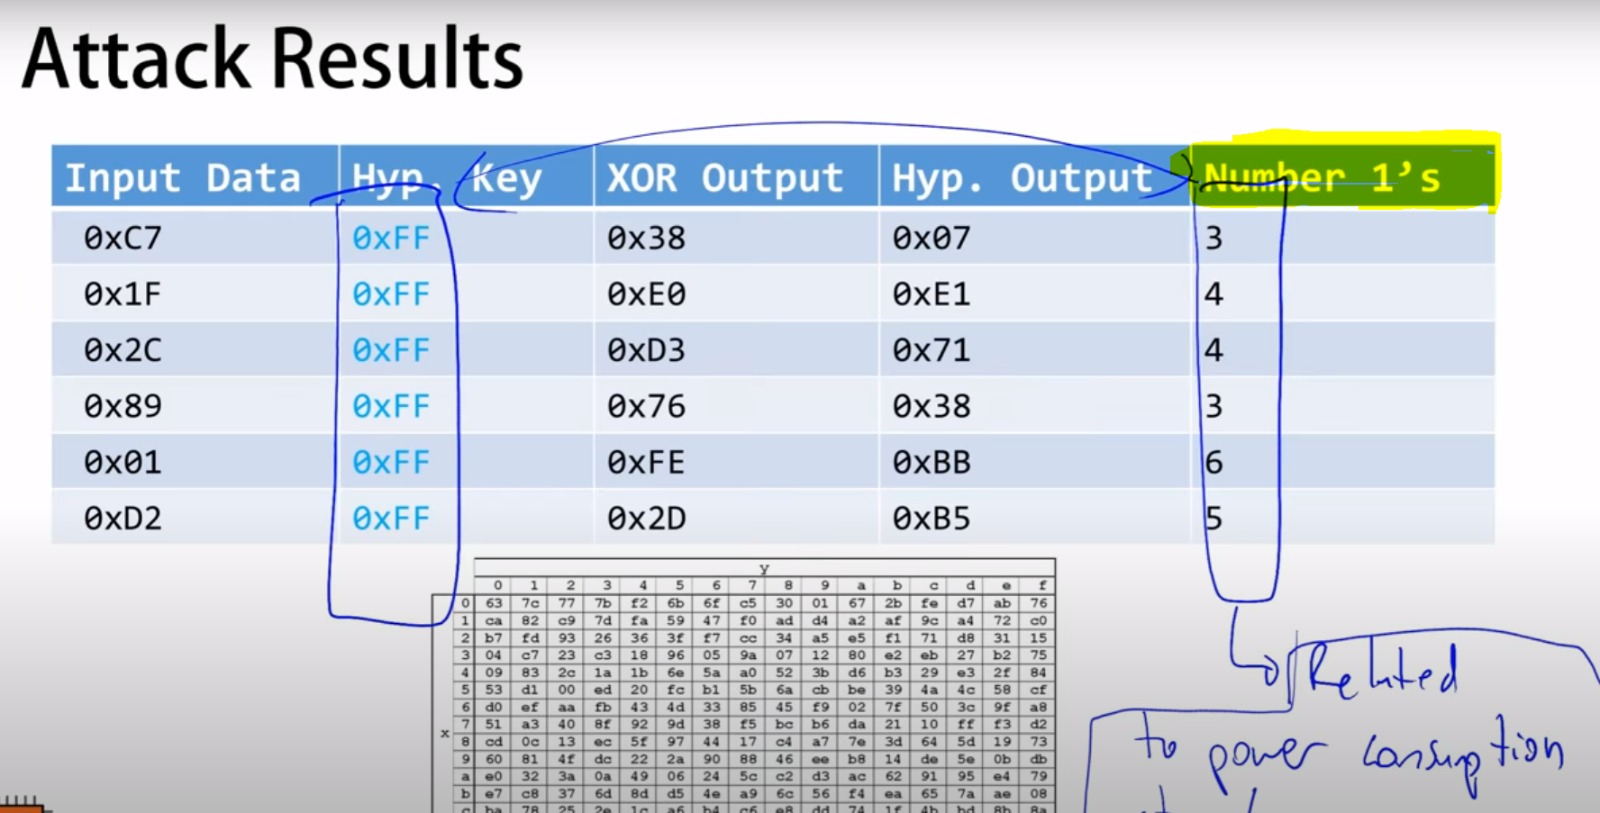

# Correlation coeficient

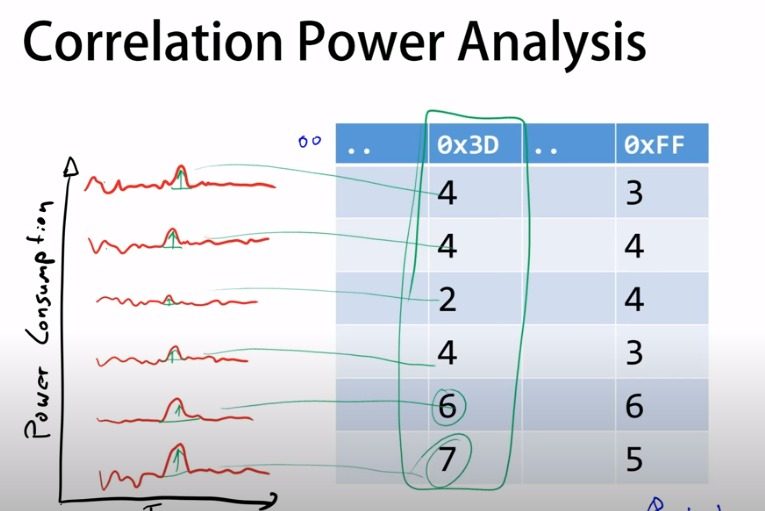

# CPA attack output